In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('events.csv')
data

,device_model,os_name,os_version,device_locale,event_name,event_json,event_timestamp,operator_name,city,appmetrica_device_id,session_id
0,"iPad11,4",ios,15.4.1,ru_RU,promo,"{""open"":""448""}",1657289445,Carrier,NaN,15051736875289922241,10000000488
1,iPhone X,ios,15.5,ru_RU,collections,"{""click_from_main"":""reсommended""}",1657359967,Tele2,NaN,10795071844267303686,10000000003
2,iPhone X,ios,15.5,ru_RU,collections,"{""click_from_main"":""reсommended""}",1657359983,Tele2,NaN,10795071844267303686,10000000003
3,iPhone X,ios,15.5,ru_RU,collections,"{""click_from_main"":""reсommended""}",1657359984,Tele2,NaN,10795071844267303686,10000000003
4,iPhone X,ios,15.5,ru_RU,collections,"{""click_from_main"":""reсommended""}",1657359984,Tele2,NaN,10795071844267303686,10000000003
...,...,...,...,...,...,...,...,...,...,...,...
1464102,iPhone X,ios,14.6,ru_RU,Синий трактор,"{""paid"":""start""}",1657091407,Mobile TeleSystems,NaN,3569081596068158176,10000000019
1464103,iPhone X,ios,14.6,ru_RU,Синий трактор,"{""paid"":""2""}",1657092048,Mobile TeleSystems,NaN,3569081596068158176,10000000020
1464104,iPhone X,ios,14.6,ru_RU,Синий трактор,"{""paid"":""start""}",1657092048,Mobile TeleSystems,NaN,3569081596068158176,10000000020
1464105,iPhone XS,ios,15.4.1,ru_TR,Синий трактор,"{""paid"":""1""}",1657103636,VODAFONE TR,NaN,7362504062805900511,10000000020


### Выборка по значению условию задания

> __Условие выборки:__ event_name  = purchase и первый ключ у event_json = subscription

In [3]:
# выборка event_name = purchase
df_group = data.groupby('event_name').get_group('purchase').copy()

# выборка event_json = subscription
df_group = df_group.assign(copy_val = lambda x:(x['event_json']))
df_group['copy_val'] = (df_group['copy_val'].apply ( lambda x: x[2:14]))
df_group = df_group.groupby('copy_val').get_group('subsription"').copy()
df_group.reset_index(inplace = True, drop = True)
df_group

,device_model,os_name,os_version,device_locale,event_name,event_json,event_timestamp,operator_name,city,appmetrica_device_id,session_id,copy_val
0,iPhone 11,ios,15.5,ru_RU,purchase,"{""subsription"":""trial_month""}",1656847021,Mobile TeleSystems,NaN,6580173042331039912,10000000003,"subsription"""
1,iPhone 11 Pro Max,ios,15.3.1,ru_RU,purchase,"{""subsription"":""year_continue""}",1656665198,MegaFon,NaN,17036039798299278349,10000001494,"subsription"""
2,iPad 7G,ios,15.3.1,ru_RU,purchase,"{""subsription"":""trial_month""}",1656723315,NaN,NaN,11884726712749491185,10000000003,"subsription"""
3,"iPad13,1",ios,15.5,en_DE,purchase,"{""subsription"":""month""}",1656919153,NaN,NaN,15790577441923540820,10000000069,"subsription"""
4,iPhone 12,ios,15.5,ru_RU,purchase,"{""subsription"":""trial_month""}",1657038203,YOTA,NaN,7195811132972355394,10000000012,"subsription"""
...,...,...,...,...,...,...,...,...,...,...,...,...
1851,iPad Air,ios,12.5.5,ru_RU,purchase,"{""subsription"":""month_continue""}",1656846660,Mobile TeleSystems,NaN,4746483851013094240,10000001057,"subsription"""
1852,iPhone 13,ios,15.4.1,ru_RU,purchase,"{""subsription"":""trial_month""}",1656764781,Mobile TeleSystems,NaN,10804755131225170624,10000000003,"subsription"""
1853,iPad 7G,ios,14.8.1,ru_RU,purchase,"{""subsription"":""month_continue""}",1657021745,NaN,NaN,3308406041175240981,10000000007,"subsription"""
1854,iPhone X,ios,14.6,ru_RU,purchase,"{""subsription"":""trial_month""}",1657049642,Mobile TeleSystems,NaN,3569081596068158176,10000000008,"subsription"""


In [4]:
#проверка пустых полей
df_group.isna().mean().sort_values(ascending=False)

city                    0.975216
operator_name           0.195043
device_model            0.000000
os_name                 0.000000
os_version              0.000000
device_locale           0.000000
event_name              0.000000
event_json              0.000000
event_timestamp         0.000000
appmetrica_device_id    0.000000
session_id              0.000000
copy_val                0.000000
dtype: float64

### Удаление ненужных столбцов

In [5]:
df_group = df_group.drop('copy_val', axis= 1)
df_group = df_group.drop('city', axis= 1)

### Отформатируем данные столбца event_json

In [6]:
import json
def func(test_data):
    result = json.loads(test_data)
    value = list(result.values())
    return str(value)

def rem(val):
    dele = "[]'"
    for char in dele:
        val = val.replace(char, "")
    return val

In [7]:
final = df_group.copy()

final['event_json'] = final['event_json'].apply(lambda data: func(data))
final['event_json'] = final['event_json'].apply(lambda data: rem(data))
final

,device_model,os_name,os_version,device_locale,event_name,event_json,event_timestamp,operator_name,appmetrica_device_id,session_id
0,iPhone 11,ios,15.5,ru_RU,purchase,trial_month,1656847021,Mobile TeleSystems,6580173042331039912,10000000003
1,iPhone 11 Pro Max,ios,15.3.1,ru_RU,purchase,year_continue,1656665198,MegaFon,17036039798299278349,10000001494
2,iPad 7G,ios,15.3.1,ru_RU,purchase,trial_month,1656723315,NaN,11884726712749491185,10000000003
3,"iPad13,1",ios,15.5,en_DE,purchase,month,1656919153,NaN,15790577441923540820,10000000069
4,iPhone 12,ios,15.5,ru_RU,purchase,trial_month,1657038203,YOTA,7195811132972355394,10000000012
...,...,...,...,...,...,...,...,...,...,...
1851,iPad Air,ios,12.5.5,ru_RU,purchase,month_continue,1656846660,Mobile TeleSystems,4746483851013094240,10000001057
1852,iPhone 13,ios,15.4.1,ru_RU,purchase,trial_month,1656764781,Mobile TeleSystems,10804755131225170624,10000000003
1853,iPad 7G,ios,14.8.1,ru_RU,purchase,month_continue,1657021745,NaN,3308406041175240981,10000000007
1854,iPhone X,ios,14.6,ru_RU,purchase,trial_month,1657049642,Mobile TeleSystems,3569081596068158176,10000000008


### Формирование выводов и построение графиков

In [8]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

<AxesSubplot:>

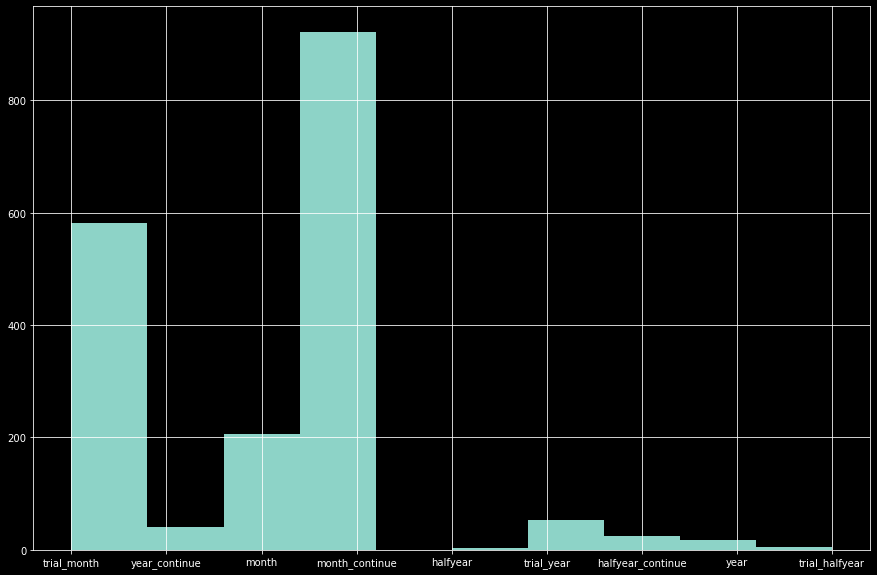

In [9]:
fig = plt.figure(figsize = (15,10))

final['event_json'].hist()

> __Вывод 1:__ самыми популярными подписками являются __ежемесячная с продлением__, __пробная ежемесячная__, __месячная__.

### Установим на каких девайсах какую подписку оформляли чаще

In [78]:
def group_devise(elem):
    #if elem in ['iPhone 11', 'iPhone XR', 'iPhone 11 Pro Max', 'iPhone 12', 'iPhone 13']:
    if elem.find("iPhone") != -1:
        return 'phone'
    if elem.find("iPad") != -1:
        return 'tablet'
    return elem    

In [95]:
# сделаем 2 группы устройств: телефоны и планшеты
final['dev_type'] = final['device_model'].apply(group_devise)

In [104]:
fig = plt.figure(figsize = (10,8))
final.groupby('dev_type', dropna=False)['event_json'].value_counts()

dev_type  event_json       
phone     trial_month          450
          month_continue       435
          month                137
          trial_year            33
          halfyear_continue     15
          year_continue         14
          year                   8
          halfyear               1
          trial_halfyear         1
tablet    month_continue       486
          trial_month          131
          month                 70
          year_continue         27
          trial_year            21
          year                  10
          halfyear_continue      9
          trial_halfyear         5
          halfyear               3
Name: event_json, dtype: int64

<Figure size 720x576 with 0 Axes>

<AxesSubplot:xlabel='dev_type,event_json'>

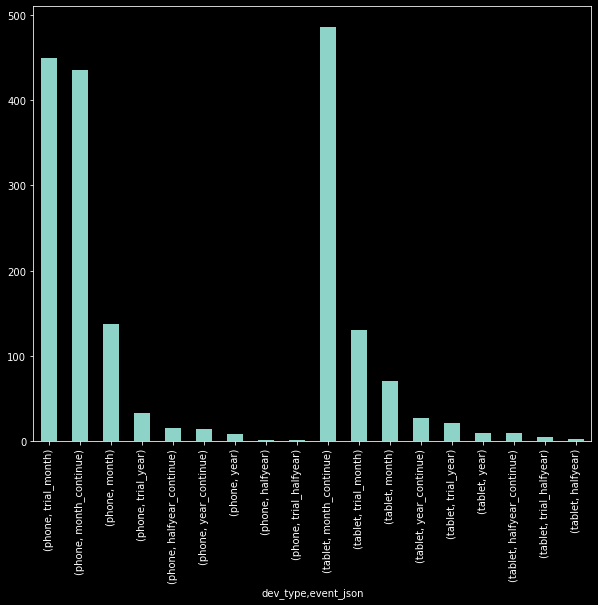

In [152]:
fig = plt.figure(figsize = (10,8))
final.groupby('dev_type', dropna=False)['event_json'].value_counts().plot(kind="bar")

> __Вывод 2:__ на __телефонах__ чаще оформляют __пробную__ подписку на месяц, на __планшете__ - __месячную__ с продлением

In [141]:
def os_vesr(elem):
    val = elem[0:2];
    if val.find('.') != -1:
        val = val.replace('.', '')
    return val  

In [149]:
# определим версии ios
final['ios_vers'] = final['os_version'].apply(os_vesr)
final

,device_model,os_name,os_version,device_locale,event_name,event_json,event_timestamp,operator_name,appmetrica_device_id,session_id,dev_type,ios_vers
0,iPhone 11,ios,15.5,ru_RU,purchase,trial_month,1656847021,Mobile TeleSystems,6580173042331039912,10000000003,phone,15
1,iPhone 11 Pro Max,ios,15.3.1,ru_RU,purchase,year_continue,1656665198,MegaFon,17036039798299278349,10000001494,phone,15
2,iPad 7G,ios,15.3.1,ru_RU,purchase,trial_month,1656723315,NaN,11884726712749491185,10000000003,tablet,15
3,"iPad13,1",ios,15.5,en_DE,purchase,month,1656919153,NaN,15790577441923540820,10000000069,tablet,15
4,iPhone 12,ios,15.5,ru_RU,purchase,trial_month,1657038203,YOTA,7195811132972355394,10000000012,phone,15
...,...,...,...,...,...,...,...,...,...,...,...,...
1851,iPad Air,ios,12.5.5,ru_RU,purchase,month_continue,1656846660,Mobile TeleSystems,4746483851013094240,10000001057,tablet,12
1852,iPhone 13,ios,15.4.1,ru_RU,purchase,trial_month,1656764781,Mobile TeleSystems,10804755131225170624,10000000003,phone,15
1853,iPad 7G,ios,14.8.1,ru_RU,purchase,month_continue,1657021745,NaN,3308406041175240981,10000000007,tablet,14
1854,iPhone X,ios,14.6,ru_RU,purchase,trial_month,1657049642,Mobile TeleSystems,3569081596068158176,10000000008,phone,14


### Проведем исследование какой оперератор на телефоне и планшете имеет большую популярность

In [261]:
final.groupby(['dev_type','operator_name'], dropna=False)['event_json'].value_counts()

dev_type  operator_name       event_json       
phone     A1 BY               trial_month            3
                              year_continue          2
          Beeline             trial_month          108
                              month_continue        92
                              month                 31
                              trial_year             7
                              halfyear_continue      2
                              year_continue          2
                              year                   1
          Bite                trial_year             1
          Carrier             month_continue        19
                              trial_month            5
                              month                  4
                              year_continue          1
          Free                trial_month            2
                              month_continue         1
          I WIND              trial_year             1
          Kcell  

<AxesSubplot:xlabel='dev_type,operator_name'>

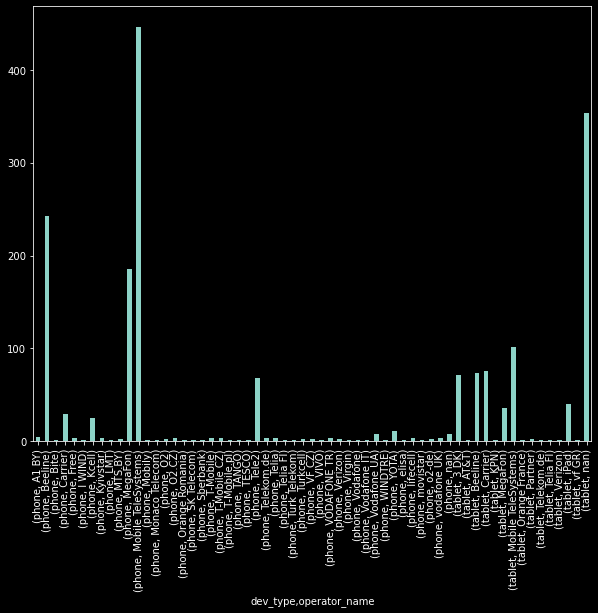

In [196]:
fig = plt.figure(figsize = (10,8))
final.groupby(['dev_type','operator_name'], dropna=False)['event_json'].count().plot(kind="bar")


> __Вывод 3:__ на __телефонах__ с операторамми : MTS, Beeline, Megafon пользователи чаще оформляли подписку на сервис. __Планшеты__, с которых была оформлена подписка, были с версией __без мобильного оператора__.


### Какой оператор на телефоне популярен на каждой версии ios

In [260]:
final2 = final[final['dev_type'] == 'phone'].copy()

In [265]:
pd.set_option('display.max_rows', final2.shape[0]+1)
final2.groupby(['ios_vers', 'operator_name'], dropna=False)['event_timestamp'].agg(['count'])

count
ios_vers operator_name            
10       Carrier                14
12       Beeline                17
         I WIND                  1
         MegaFon                 5
         Mobile TeleSystems      5
         Tele2                  12
         Vodafone UA             1
         YOTA                    1
         NaN                     2
13       Beeline                 3
         Carrier                 2
         MegaFon                 1
         Mobile TeleSystems     14
         Tele2                  10
         VODAFONE TR             1
         Vodafone UA             1
14       A1 BY                   2
         Beeline                61
         Carrier                 6
         Kcell                   3
         Kyivstar                1
         MegaFon                15
         Mobile TeleSystems     63
         Tele2                  16
         Telekom.de              1
         Telia                   2
         Turk Telekom            1
         Turkcell                1
         VF CZ                   1
         Vodafone IT             1
         Vodafone UA             1
         YOTA                    1
         o2-de                   1
         NaN                     1
15       A1 BY                   3
         Beeline               162
         Bite                    1
         Carrier                 7
         Free                    3
         Kcell                  22
         Kyivstar                2
         LMT                     1
         MTS.BY                  2
         MegaFon               165
         Mobile TeleSystems    364
         Mobily                  1
         Monaco Telecom          1
         O2                      2
         O2.CZ                   3
         Orange Romania          1
         SK Telecom              1
         Sberbank                1
         T-Mobile                3
         T-Mobile CZ             4
         T-Mobile.pl             1
         TANGO                   1
         TESCO                   1
         Tele2                  30
         Telekom.de              2
         Telia                   2
         Telia FI                1
         Turkcell                1
         VF CZ                   1
         VIVO                    1
         VODAFONE TR             2
         Verizon                 2
         Virgin                  1
         Vodafone                1
         Vodafone UA             5
         WINDTRE                 1
         YOTA                    9
         elisa                   1
         lifecell                4
         movistar                1
         o2-de                   1
         vodafone UK             3
         NaN                     5

> __Вывод 4:__ ОС и приоритетный оператор:
***
10 -> Carrier
***
12 -> Beeline
***
13 -> MTS
***
14 -> MTS
***
15 -> MTS

In [268]:
final

,device_model,os_name,os_version,device_locale,event_name,event_json,event_timestamp,operator_name,appmetrica_device_id,session_id,dev_type,ios_vers
0,iPhone 11,ios,15.5,ru_RU,purchase,trial_month,1656847021,Mobile TeleSystems,6580173042331039912,10000000003,phone,15
1,iPhone 11 Pro Max,ios,15.3.1,ru_RU,purchase,year_continue,1656665198,MegaFon,17036039798299278349,10000001494,phone,15
2,iPad 7G,ios,15.3.1,ru_RU,purchase,trial_month,1656723315,NaN,11884726712749491185,10000000003,tablet,15
3,"iPad13,1",ios,15.5,en_DE,purchase,month,1656919153,NaN,15790577441923540820,10000000069,tablet,15
4,iPhone 12,ios,15.5,ru_RU,purchase,trial_month,1657038203,YOTA,7195811132972355394,10000000012,phone,15
...,...,...,...,...,...,...,...,...,...,...,...,...
1851,iPad Air,ios,12.5.5,ru_RU,purchase,month_continue,1656846660,Mobile TeleSystems,4746483851013094240,10000001057,tablet,12
1852,iPhone 13,ios,15.4.1,ru_RU,purchase,trial_month,1656764781,Mobile TeleSystems,10804755131225170624,10000000003,phone,15
1853,iPad 7G,ios,14.8.1,ru_RU,purchase,month_continue,1657021745,NaN,3308406041175240981,10000000007,tablet,14
1854,iPhone X,ios,14.6,ru_RU,purchase,trial_month,1657049642,Mobile TeleSystems,3569081596068158176,10000000008,phone,14


### Локализация телефона/планшета

In [272]:
final.groupby(['dev_type','device_locale'], dropna=False)['event_json'].agg(['count'])

count
dev_type device_locale       
phone    en_FI              1
         en_GB              5
         en_RU              6
         en_TR              1
         en_US              6
         fi_FI              1
         fr_FR              1
         ru_AE              3
         ru_AM             11
         ru_AT              1
         ru_AU              2
         ru_AZ              1
         ru_BG              1
         ru_BR              1
         ru_BY              7
         ru_CH              2
         ru_CZ              1
         ru_DE              8
         ru_EE              6
         ru_ES              3
         ru_FI              1
         ru_FR              6
         ru_GB              6
         ru_HR              1
         ru_IT              2
         ru_KZ             36
         ru_LU              1
         ru_LV              2
         ru_MD              1
         ru_MN              1
         ru_NL              6
         ru_PL              1
         ru_PT              1
         ru_RO              4
         ru_RU            887
         ru_SC              1
         ru_SE             11
         ru_SG              1
         ru_SM              3
         ru_TH              1
         ru_TR              9
         ru_UA             24
         ru_US             14
         uk_CZ              1
         uk_UA              4
         uk_US              1
tablet   de_DE              1
         en_DE              2
         en_GB              4
         en_NZ              1
         en_RU              7
         en_SE              1
         en_UA              7
         en_US              6
         nb_NO              1
         nl_BE              1
         ru_AS              1
         ru_AT              1
         ru_BY              3
         ru_DE              3
         ru_DK             75
         ru_EE              1
         ru_FI              3
         ru_GR              1
         ru_KG              1
         ru_KZ             15
         ru_RU            602
         ru_TR              2
         ru_UA              9
         ru_US             12
         sv_SE              1
         uk_UA              1

> __Вывод 5:__ подписку оплачивали:
***
__телофоны__ с локализацией: ru_RU (887), ru_KZ (36), ru_UA(24). 
*** 
__планшеты__ приоритетная локализация: ru_RU (602), ru_DK (75), ru_US (12).
